In [1]:
import numpy as np
import igraph as ig
import pandas as pd
import matplotlib.pyplot as plt

from time import time

from common import *
from generate import *
from filter_kruskal import *

In [2]:
#common.run(args="--help")
run(args="--help")

Allowed options:
  -h [ --help ]                      produce help message
  -m [ --mst-kernel ] arg (=1)       Kernel used calculating MST. 0 = regular 
                                     kruskal, 1 = filter-kruskal
  -s [ --sort-kernel ] arg (=1)      Kernel used for sort() [int]
  -p [ --partition-kernel ] arg (=1) Kernel used for partition() [int]
  --pinned-memory                    use pinned memory (OFF by default)
  -f [ --filter-kernel ] arg (=0)    Kernel used for filter() [int]
  -c [ --compress-level ] arg (=1)   Kernel used for compress() [int]
  -r [ --recusion-depth ] arg (=32)  Kernel used for compress() [int]
  -n [ --repetitions ] arg (=1)      Number of times the MST calculation is 
                                     repeated [int]
  -i [ --inputfile ] arg             input file containing graph data. Filepath
                                     must be relative to Ex2/
  -t [ --ouputfile_timings ] arg     Output file for timings. Filepath must be 
             

In [3]:
args = f"--inputfile benchmark_data/barabasi_1600_50pct.csv --mst-kernel 1 -s 1 -n 10"
df = common.run_benchmark(common.OUT_DIR / "timing_results.csv", args=args, print_output=True)
df

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/timing_results.csv --inputfile benchmark_data/barabasi_1600_50pct.csv --mst-kernel 1 -s 1 -n 10
639054 Edges loaded

Benchmark results:
Initialize	µ=0.0159894s	sigma=0.0149768s	median=0.000152357s	total=0.159894	num_calls=10
Kruskal()	µ=0.0423589s	sigma=0.00810012s	median=0.014813s	total=0.423589	num_calls=10
compress()	µ=2.09033e-07s	sigma=1.30692e-08s	median=1.8e-07s	total=6.271e-06	num_calls=30
filter()	µ=0.00191178s	sigma=0.000254838s	median=0.00273504s	total=0.0573535	num_calls=30
grow MST	µ=0.000466263s	sigma=4.89727e-05s	median=0.000314512s	total=0.00466263	num_calls=10
partition()	µ=0.00111968s	sigma=0.000125415s	median=0.00103221s	total=0.0335904	num_calls=30
sort()	µ=0.0415955s	sigma=0.00801833s	median=0.0143348s	total=0.415955	num_calls=10
total	µ=0.0674834s	sigma=0.0143432s	median=0.0231304s	total=0.674834	num_calls=10

,tag,average,std_dev,median,total,num_calls
0,Initialize,1.598940e-02,1.497680e-02,1.523570e-04,0.159894,10
1,Kruskal(),4.235890e-02,8.100120e-03,1.481300e-02,0.423589,10
2,compress(),2.090330e-07,1.306920e-08,1.800000e-07,0.000006,30
3,filter(),1.911780e-03,2.548380e-04,2.735040e-03,0.057354,30
4,grow MST,4.662630e-04,4.897270e-05,3.145120e-04,0.004663,10
5,partition(),1.119680e-03,1.254150e-04,1.032210e-03,0.033590,30
6,sort(),4.159550e-02,8.018330e-03,1.433480e-02,0.415955,10
7,total,6.748340e-02,1.434320e-02,2.313040e-02,0.674834,10


In [4]:
args = f"--inputfile benchmark_data/barabasi_1600_50pct.csv --mst-kernel 0 -s 1 -n 10"
df = common.run_benchmark(common.OUT_DIR / "timing_results.csv", args=args, print_output=True)
df

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/timing_results.csv --inputfile benchmark_data/barabasi_1600_50pct.csv --mst-kernel 0 -s 1 -n 10
639054 Edges loaded

Benchmark results:
Initialize	µ=0.0111034s	sigma=0.0103791s	median=0.000133109s	total=0.111034	num_calls=10
Kruskal()	µ=0.32737s	sigma=0.0114533s	median=0.314881s	total=3.2737	num_calls=10
grow MST	µ=0.00342109s	sigma=2.79755e-06s	median=0.00342728s	total=0.0342109	num_calls=10
sort()	µ=0.32319s	sigma=0.0114523s	median=0.310707s	total=3.2319	num_calls=10
total	µ=0.338475s	sigma=0.0218323s	median=0.315015s	total=3.38475	num_calls=10


,tag,average,std_dev,median,total,num_calls
0,Initialize,0.011103,0.010379,0.000133,0.111034,10
1,Kruskal(),0.327370,0.011453,0.314881,3.273700,10
2,grow MST,0.003421,0.000003,0.003427,0.034211,10
3,sort(),0.323190,0.011452,0.310707,3.231900,10
4,total,0.338475,0.021832,0.315015,3.384750,10


In [5]:
run(args="--help")

Allowed options:
  -h [ --help ]                      produce help message
  -m [ --mst-kernel ] arg (=1)       Kernel used calculating MST. 0 = regular 
                                     kruskal, 1 = filter-kruskal
  -s [ --sort-kernel ] arg (=1)      Kernel used for sort() [int]
  -p [ --partition-kernel ] arg (=1) Kernel used for partition() [int]
  --pinned-memory                    use pinned memory (OFF by default)
  -f [ --filter-kernel ] arg (=0)    Kernel used for filter() [int]
  -c [ --compress-level ] arg (=1)   Kernel used for compress() [int]
  -r [ --recusion-depth ] arg (=32)  Kernel used for compress() [int]
  -n [ --repetitions ] arg (=1)      Number of times the MST calculation is 
                                     repeated [int]
  -i [ --inputfile ] arg             input file containing graph data. Filepath
                                     must be relative to Ex2/
  -t [ --ouputfile_timings ] arg     Output file for timings. Filepath must be 
             

In [6]:
whatever_runs = [{'n_nodes': 200, 'density': '50pct', 'prefix':'all_one', 'flags':'-m 1 -s 1 -p 1 -f 1 -c 1 -r 1 -n 10'},
                {'n_nodes': 400, 'density': '50pct', 'prefix':'all_one', 'flags':'-m 1 -s 1 -p 1 -f 1 -c 1 -r 1 -n 10'},
                {'n_nodes': 800, 'density': '50pct', 'prefix':'all_one', 'flags':'-m 1 -s 1 -p 1 -f 1 -c 1 -r 1 -n 10'},
                {'n_nodes': 1600, 'density': '50pct', 'prefix':'all_one', 'flags':'-m 1 -s 1 -p 1 -f 1 -c 1 -r 1 -n 10'},
                {'n_nodes': 3200, 'density': '50pct', 'prefix':'all_one', 'flags':'-m 1 -s 1 -p 1 -f 1 -c 1 -r 1 -n 10'},
                {'n_nodes': 6400, 'density': '50pct', 'prefix':'all_one', 'flags':'-m 1 -s 1 -p 1 -f 1 -c 1 -r 1 -n 10'},
                {'n_nodes': 200, 'density': '50pct', 'prefix':'all_zero', 'flags':'-m 0 -s 0 -p 0 -f 0 -c 0 -r 0 -n 10'},
                {'n_nodes': 400, 'density': '50pct', 'prefix':'all_zero', 'flags':'-m 0 -s 0 -p 0 -f 0 -c 0 -r 0 -n 10'},
                {'n_nodes': 800, 'density': '50pct', 'prefix':'all_zero', 'flags':'-m 0 -s 0 -p 0 -f 0 -c 0 -r 0 -n 10'},
                {'n_nodes': 1600, 'density': '50pct', 'prefix':'all_zero', 'flags':'-m 0 -s 0 -p 0 -f 0 -c 0 -r 0 -n 10'}
                ]

n_nodes_list_d10 = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
n_nodes_list_d50 = [50, 100, 200, 400, 800, 1600, 3200, 6400, 12800]
n_nodes_list_d90 = [25, 50, 100, 200, 400, 800, 1600, 3200, 6400]
n_nodes_list_sparse = [15625, 31250, 65500, 125000, 250000, 500000, 1000000, 2000000]

def get_run_list(n_nodes_list, density, prefix, flags, reps_standard=10, reps_last=3):
    run_list = []
    for n_nodes in n_nodes_list[:-1]:
        run_list.append({'n_nodes': n_nodes, 'density': density, 'prefix': prefix, 'flags': flags + f' -n {reps_standard}'})
    # fewer repetitions on the biggest graph
    run_list.append({'n_nodes': n_nodes_list[-1], 'density': density, 'prefix': prefix, 'flags': flags + f' -n {reps_last}'})
    return run_list


#define SORT_KERNEL_GPU_BUBBLE_MULT 0
#define SORT_KERNEL_MERGE_SORT 1
#define SORT_KERNEL_THRUST 2
#define SORT_KERNEL_RADIX 3

#define PARTITION_KERNEL_CPU_NAIVE 0
#define PARTITION_KERNEL_GPU 1
#define PARTITION_KERNEL_STREAMS 2
#define PARTITION_KERNEL_THRUST 3

#define FILTER_KERNEL_CPU_NAIVE 0
#define FILTER_KERNEL_GPU 1
#define FILTER_KERNEL_THRUST 2

#define COMPRESS_NOTHING 0
#define COMPRESS_KERNEL_CPU_NAIVE 1
#define COMPRESS_KERNEL_GPU 2
#define COMPRESS_KERNEL_GPU_LIMITED 3

"""
-m ... 0 : regular kruskal, 1 : filter kruskal
-s ... 2 : thrust sort, 3 : radix sort
-p ... 0 : partition cpu, 1 : partition gpu, 2 : partition thrust
-f ... 0 : filter cpu, 1 : filter gpu, 2 : filter thrust
-c ... 0 : no path compression, 1 : default, 2,3 : additional options

--pinned-memory 

"""


# compare thrust sort with radix sort
regK_thrustsort_runs_sparse = get_run_list(n_nodes_list_sparse, 'sparse', 'regK_thrustsort', '-m 0 -s 2')
regK_thrustsort_runs_d10 = get_run_list(n_nodes_list_d10, '10pct', 'regK_thrustsort', '-m 0 -s 2')
regK_thrustsort_runs_d50 = get_run_list(n_nodes_list_d50, '50pct', 'regK_thrustsort', '-m 0 -s 2')
regK_thrustsort_runs_d90 = get_run_list(n_nodes_list_d90, '90pct', 'regK_thrustsort', '-m 0 -s 2')

regK_radix_runs_sparse = get_run_list(n_nodes_list_sparse, 'sparse', 'regK_radix', '-m 0 -s 3')
regK_radix_runs_d10 = get_run_list(n_nodes_list_d10, '10pct', 'regK_radix', '-m 0 -s 3')
regK_radix_runs_d50 = get_run_list(n_nodes_list_d50, '50pct', 'regK_radix', '-m 0 -s 3')
regK_radix_runs_d90 = get_run_list(n_nodes_list_d90, '90pct', 'regK_radix', '-m 0 -s 3')

regK_radix_pin_runs_sparse = get_run_list(n_nodes_list_sparse, 'sparse', 'regK_radix_pin', '-m 0 -s 3 --pinned-memory')
regK_radix_pin_runs_d10 = get_run_list(n_nodes_list_d10, '10pct', 'regK_radix_pin', '-m 0 -s 3 --pinned-memory')
regK_radix_pin_runs_d50 = get_run_list(n_nodes_list_d50, '50pct', 'regK_radix_pin', '-m 0 -s 3 --pinned-memory')
regK_radix_pin_runs_d90 = get_run_list(n_nodes_list_d90, '90pct', 'regK_radix_pin', '-m 0 -s 3 --pinned-memory')


# compare all thrust with our kernels (filter and partition on cpu)
filK_all_thrust_sparse = get_run_list(n_nodes_list_sparse, 'sparse', 'filK_all_thrust', '-m 1 -s 2 -p 3 -f 2')
filK_all_thrust_d10 = get_run_list(n_nodes_list_d10, '10pct', 'filK_all_thrust', '-m 1 -s 2 -p 3 -f 2')
filK_all_thrust_d50 = get_run_list(n_nodes_list_d50, '50pct', 'filK_all_thrust', '-m 1 -s 2 -p 3 -f 2')
filK_all_thrust_d90 = get_run_list(n_nodes_list_d90, '90pct', 'filK_all_thrust', '-m 1 -s 2 -p 3 -f 2')

#filK_f0p0s3_d10 = get_run_list(n_nodes_list_d10, '10pct', 'filK_f0p0s3', '-m 1 -f 0 -p 0 -s 3')
#filK_f0p0s3_d50 = get_run_list(n_nodes_list_d50, '50pct', 'filK_f0p0s3', '-m 1 -f 0 -p 0 -s 3')
#filK_f0p0s3_d90 = get_run_list(n_nodes_list_d90, '90pct', 'filK_f0p0s3', '-m 1 -f 0 -p 0 -s 3')

# our kernels (filter and partition on gpu)
filK_f1p1s3_sparse = get_run_list(n_nodes_list_sparse, 'sparse', 'filK_f1p1s3', '-m 1 -f 1 -p 1 -s 3')
filK_f1p1s3_d10 = get_run_list(n_nodes_list_d10, '10pct', 'filK_f1p1s3', '-m 1 -f 1 -p 1 -s 3', reps_standard=3, reps_last=3)
#filK_f1p1s3_d50 = get_run_list(n_nodes_list_d50, '50pct', 'filK_f1p1s3', '-m 1 -f 1 -p 1 -s 3')
filK_f1p1s3_d50 = get_run_list(n_nodes_list_d50, '50pct', 'filK_f1p1s3', '-m 1 -f 1 -p 1 -s 3', reps_standard=3, reps_last=3)
filK_f1p1s3_d90 = get_run_list(n_nodes_list_d90, '90pct', 'filK_f1p1s3', '-m 1 -f 1 -p 1 -s 3')

filK_f1p2s3_sparse = get_run_list(n_nodes_list_sparse, 'sparse', 'filK_f1p2s3', '-m 1 -f 1 -p 2 -s 3')
#filK_f1p2s3_d10 = get_run_list(n_nodes_list_d10, '10pct', 'filK_f1p2s3', '-m 1 -f 1 -p 2 -s 3')
filK_f1p2s3_d10 = get_run_list(n_nodes_list_d10, '10pct', 'filK_f1p2s3', '-m 1 -f 1 -p 2 -s 3', reps_standard=3, reps_last=3)
filK_f1p2s3_d50 = get_run_list(n_nodes_list_d50, '50pct', 'filK_f1p2s3', '-m 1 -f 1 -p 2 -s 3')
filK_f1p2s3_d90 = get_run_list(n_nodes_list_d90, '90pct', 'filK_f1p2s3', '-m 1 -f 1 -p 2 -s 3')



In [7]:
do_benchmark_runs(regK_radix_pin_runs_sparse)

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_radix_pin_15625_sparse.csv --inputfile benchmark_data/barabasi_15625_sparse.csv -m 0 -c 0 -s 3 --pinned-memory -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_radix_pin_31250_sparse.csv --inputfile benchmark_data/barabasi_31250_sparse.csv -m 0 -c 0 -s 3 --pinned-memory -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_radix_pin_65500_sparse.csv --inputfile benchmark_data/barabasi_65500_sparse.csv -m 0 -c 0 -s 3 --pinned-memory -n 10


KeyboardInterrupt: 

In [ ]:
do_benchmark_runs(regK_radix_pin_runs_d10)

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_radix_pin_100_10pct.csv --inputfile benchmark_data/barabasi_100_10pct.csv -m 0 -s 3 --pinned-memory -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_radix_pin_200_10pct.csv --inputfile benchmark_data/barabasi_200_10pct.csv -m 0 -s 3 --pinned-memory -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_radix_pin_400_10pct.csv --inputfile benchmark_data/barabasi_400_10pct.csv -m 0 -s 3 --pinned-memory -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_radix_pin_800_10pct.csv --inpu

In [ ]:
do_benchmark_runs(regK_radix_pin_runs_d50)

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_radix_pin_50_50pct.csv --inputfile benchmark_data/barabasi_50_50pct.csv -m 0 -s 3 --pinned-memory -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_radix_pin_100_50pct.csv --inputfile benchmark_data/barabasi_100_50pct.csv -m 0 -s 3 --pinned-memory -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_radix_pin_200_50pct.csv --inputfile benchmark_data/barabasi_200_50pct.csv -m 0 -s 3 --pinned-memory -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_radix_pin_400_50pct.csv --inputf

In [ ]:
do_benchmark_runs(regK_radix_pin_runs_d90)

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_radix_pin_25_90pct.csv --inputfile benchmark_data/barabasi_25_90pct.csv -m 0 -s 3 --pinned-memory -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_radix_pin_50_90pct.csv --inputfile benchmark_data/barabasi_50_90pct.csv -m 0 -s 3 --pinned-memory -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_radix_pin_100_90pct.csv --inputfile benchmark_data/barabasi_100_90pct.csv -m 0 -s 3 --pinned-memory -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_radix_pin_200_90pct.csv --inputfil

In [ ]:
do_benchmark_runs(filK_f1p2s3_sparse)

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_f1p2s3_15625_sparse.csv --inputfile benchmark_data/barabasi_15625_sparse.csv -m 1 -f 1 -p 2 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_f1p2s3_31250_sparse.csv --inputfile benchmark_data/barabasi_31250_sparse.csv -m 1 -f 1 -p 2 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_f1p2s3_65500_sparse.csv --inputfile benchmark_data/barabasi_65500_sparse.csv -m 1 -f 1 -p 2 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_f1p2s3_125000_sparse.csv --inputfile be

In [ ]:
# crashed (change number of runs)
do_benchmark_runs(filK_f1p2s3_d10)

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_f1p2s3_100_10pct.csv --inputfile benchmark_data/barabasi_100_10pct.csv -m 1 -f 1 -p 2 -s 3 -n 3
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_f1p2s3_200_10pct.csv --inputfile benchmark_data/barabasi_200_10pct.csv -m 1 -f 1 -p 2 -s 3 -n 3
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_f1p2s3_400_10pct.csv --inputfile benchmark_data/barabasi_400_10pct.csv -m 1 -f 1 -p 2 -s 3 -n 3
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_f1p2s3_800_10pct.csv --inputfile benchmark_data/barabasi_800

In [ ]:
do_benchmark_runs(filK_f1p2s3_d50)

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_f1p2s3_50_50pct.csv --inputfile benchmark_data/barabasi_50_50pct.csv -m 1 -f 1 -p 2 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_f1p2s3_100_50pct.csv --inputfile benchmark_data/barabasi_100_50pct.csv -m 1 -f 1 -p 2 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_f1p2s3_200_50pct.csv --inputfile benchmark_data/barabasi_200_50pct.csv -m 1 -f 1 -p 2 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_f1p2s3_400_50pct.csv --inputfile benchmark_data/barabasi_40

In [ ]:
do_benchmark_runs(filK_f1p2s3_d90)

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_f1p2s3_25_90pct.csv --inputfile benchmark_data/barabasi_25_90pct.csv -m 1 -f 1 -p 2 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_f1p2s3_50_90pct.csv --inputfile benchmark_data/barabasi_50_90pct.csv -m 1 -f 1 -p 2 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_f1p2s3_100_90pct.csv --inputfile benchmark_data/barabasi_100_90pct.csv -m 1 -f 1 -p 2 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_f1p2s3_200_90pct.csv --inputfile benchmark_data/barabasi_200_

In [ ]:
do_benchmark_runs(filK_f1p1s3_sparse)

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_f1p1s3_15625_sparse.csv --inputfile benchmark_data/barabasi_15625_sparse.csv -m 1 -f 1 -p 1 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_f1p1s3_31250_sparse.csv --inputfile benchmark_data/barabasi_31250_sparse.csv -m 1 -f 1 -p 1 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_f1p1s3_65500_sparse.csv --inputfile benchmark_data/barabasi_65500_sparse.csv -m 1 -f 1 -p 1 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_f1p1s3_125000_sparse.csv --inputfile be

In [ ]:
do_benchmark_runs(filK_f1p1s3_d10)

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_f1p1s3_100_10pct.csv --inputfile benchmark_data/barabasi_100_10pct.csv -m 1 -f 1 -p 1 -s 3 -n 3
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_f1p1s3_200_10pct.csv --inputfile benchmark_data/barabasi_200_10pct.csv -m 1 -f 1 -p 1 -s 3 -n 3
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_f1p1s3_400_10pct.csv --inputfile benchmark_data/barabasi_400_10pct.csv -m 1 -f 1 -p 1 -s 3 -n 3
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_f1p1s3_800_10pct.csv --inputfile benchmark_data/barabasi_800

CalledProcessError: Command '['/home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2', '--ouputfile_timings', '/home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_f1p1s3_6400_10pct.csv', '--inputfile', 'benchmark_data/barabasi_6400_10pct.csv', '-m', '1', '-f', '1', '-p', '1', '-s', '3', '-n', '3']' died with <Signals.SIGSEGV: 11>.

In [ ]:
# chrashes
do_benchmark_runs(filK_f1p1s3_d50)

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_f1p1s3_50_50pct.csv --inputfile benchmark_data/barabasi_50_50pct.csv -m 1 -f 1 -p 1 -s 3 -n 3
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_f1p1s3_100_50pct.csv --inputfile benchmark_data/barabasi_100_50pct.csv -m 1 -f 1 -p 1 -s 3 -n 3
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_f1p1s3_200_50pct.csv --inputfile benchmark_data/barabasi_200_50pct.csv -m 1 -f 1 -p 1 -s 3 -n 3
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_f1p1s3_400_50pct.csv --inputfile benchmark_data/barabasi_400_5

In [ ]:
# didnt call this one
do_benchmark_runs(filK_f1p1s3_d90)

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_f1p1s3_25_90pct.csv --inputfile benchmark_data/barabasi_25_90pct.csv -m 1 -f 1 -p 1 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_f1p1s3_50_90pct.csv --inputfile benchmark_data/barabasi_50_90pct.csv -m 1 -f 1 -p 1 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_f1p1s3_100_90pct.csv --inputfile benchmark_data/barabasi_100_90pct.csv -m 1 -f 1 -p 1 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_f1p1s3_200_90pct.csv --inputfile benchmark_data/barabasi_200_

In [ ]:
do_benchmark_runs(filK_all_thrust_sparse)

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_all_thrust_15625_sparse.csv --inputfile benchmark_data/barabasi_15625_sparse.csv -s 2 -p 3 -f 2 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_all_thrust_31250_sparse.csv --inputfile benchmark_data/barabasi_31250_sparse.csv -s 2 -p 3 -f 2 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_all_thrust_65500_sparse.csv --inputfile benchmark_data/barabasi_65500_sparse.csv -s 2 -p 3 -f 2 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_all_thrust_125000_sparse.csv --inputfile b

In [ ]:
do_benchmark_runs(filK_all_thrust_d10)

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_all_thrust_100_10pct.csv --inputfile benchmark_data/barabasi_100_10pct.csv -s 2 -p 3 -f 2 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_all_thrust_200_10pct.csv --inputfile benchmark_data/barabasi_200_10pct.csv -s 2 -p 3 -f 2 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_all_thrust_400_10pct.csv --inputfile benchmark_data/barabasi_400_10pct.csv -s 2 -p 3 -f 2 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_all_thrust_800_10pct.csv --inputfile benchmark_data/barabasi

In [ ]:
do_benchmark_runs(filK_all_thrust_d50)

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_all_thrust_50_50pct.csv --inputfile benchmark_data/barabasi_50_50pct.csv -s 2 -p 3 -f 2 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_all_thrust_100_50pct.csv --inputfile benchmark_data/barabasi_100_50pct.csv -s 2 -p 3 -f 2 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_all_thrust_200_50pct.csv --inputfile benchmark_data/barabasi_200_50pct.csv -s 2 -p 3 -f 2 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_all_thrust_400_50pct.csv --inputfile benchmark_data/barabasi_4

In [ ]:
do_benchmark_runs(filK_all_thrust_d90)

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_all_thrust_25_90pct.csv --inputfile benchmark_data/barabasi_25_90pct.csv -s 2 -p 3 -f 2 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_all_thrust_50_90pct.csv --inputfile benchmark_data/barabasi_50_90pct.csv -s 2 -p 3 -f 2 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_all_thrust_100_90pct.csv --inputfile benchmark_data/barabasi_100_90pct.csv -s 2 -p 3 -f 2 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_all_thrust_200_90pct.csv --inputfile benchmark_data/barabasi_200

In [ ]:
do_benchmark_runs(regK_thrustsort_runs_sparse)

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_thrustsort_15625_sparse.csv --inputfile benchmark_data/barabasi_15625_sparse.csv -m 0 -s 2 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_thrustsort_31250_sparse.csv --inputfile benchmark_data/barabasi_31250_sparse.csv -m 0 -s 2 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_thrustsort_65500_sparse.csv --inputfile benchmark_data/barabasi_65500_sparse.csv -m 0 -s 2 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_thrustsort_125000_sparse.csv --inputfile benchmark_data/b

In [ ]:
do_benchmark_runs(regK_thrustsort_runs_d10)

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_thrustsort_100_10pct.csv --inputfile benchmark_data/barabasi_100_10pct.csv -m 0 -s 2 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_thrustsort_200_10pct.csv --inputfile benchmark_data/barabasi_200_10pct.csv -m 0 -s 2 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_thrustsort_400_10pct.csv --inputfile benchmark_data/barabasi_400_10pct.csv -m 0 -s 2 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_thrustsort_800_10pct.csv --inputfile benchmark_data/barabasi_800_10pct.csv 

In [ ]:
do_benchmark_runs(regK_thrustsort_runs_d50)

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_thrustsort_50_50pct.csv --inputfile benchmark_data/barabasi_50_50pct.csv -m 0 -s 2 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_thrustsort_100_50pct.csv --inputfile benchmark_data/barabasi_100_50pct.csv -m 0 -s 2 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_thrustsort_200_50pct.csv --inputfile benchmark_data/barabasi_200_50pct.csv -m 0 -s 2 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_thrustsort_400_50pct.csv --inputfile benchmark_data/barabasi_400_50pct.csv -m

In [ ]:
do_benchmark_runs(regK_thrustsort_runs_d90)

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_thrustsort_25_90pct.csv --inputfile benchmark_data/barabasi_25_90pct.csv -m 0 -s 2 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_thrustsort_50_90pct.csv --inputfile benchmark_data/barabasi_50_90pct.csv -m 0 -s 2 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_thrustsort_100_90pct.csv --inputfile benchmark_data/barabasi_100_90pct.csv -m 0 -s 2 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_thrustsort_200_90pct.csv --inputfile benchmark_data/barabasi_200_90pct.csv -m 0

In [ ]:
do_benchmark_runs(regK_radix_runs_sparse)

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_radix_15625_sparse.csv --inputfile benchmark_data/barabasi_15625_sparse.csv -m 0 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_radix_31250_sparse.csv --inputfile benchmark_data/barabasi_31250_sparse.csv -m 0 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_radix_65500_sparse.csv --inputfile benchmark_data/barabasi_65500_sparse.csv -m 0 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_radix_125000_sparse.csv --inputfile benchmark_data/barabasi_125000_spars

In [ ]:
do_benchmark_runs(regK_radix_runs_d10)

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_radix_100_10pct.csv --inputfile benchmark_data/barabasi_100_10pct.csv -m 0 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_radix_200_10pct.csv --inputfile benchmark_data/barabasi_200_10pct.csv -m 0 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_radix_400_10pct.csv --inputfile benchmark_data/barabasi_400_10pct.csv -m 0 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_radix_800_10pct.csv --inputfile benchmark_data/barabasi_800_10pct.csv -m 0 -s 3 -n 10
Runn

In [ ]:
do_benchmark_runs(regK_radix_runs_d50)

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_radix_50_50pct.csv --inputfile benchmark_data/barabasi_50_50pct.csv -m 0 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_radix_100_50pct.csv --inputfile benchmark_data/barabasi_100_50pct.csv -m 0 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_radix_200_50pct.csv --inputfile benchmark_data/barabasi_200_50pct.csv -m 0 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_radix_400_50pct.csv --inputfile benchmark_data/barabasi_400_50pct.csv -m 0 -s 3 -n 10
Runnin

In [ ]:
do_benchmark_runs(regK_radix_runs_d90)

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_radix_25_90pct.csv --inputfile benchmark_data/barabasi_25_90pct.csv -m 0 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_radix_50_90pct.csv --inputfile benchmark_data/barabasi_50_90pct.csv -m 0 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_radix_100_90pct.csv --inputfile benchmark_data/barabasi_100_90pct.csv -m 0 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_radix_200_90pct.csv --inputfile benchmark_data/barabasi_200_90pct.csv -m 0 -s 3 -n 10
Running 

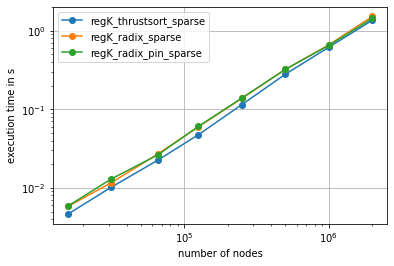

In [ ]:
plot_lines(regK_thrustsort_runs_sparse + regK_radix_runs_sparse + regK_radix_pin_runs_sparse)
plt.savefig(common.OUT_DIR / "radix_vs_thrustsort_sparse.png", dpi=200)

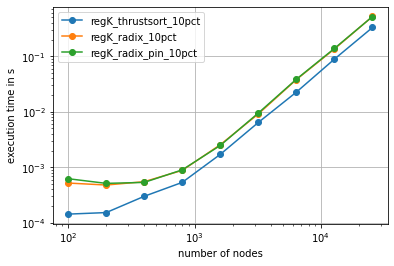

In [ ]:
plot_lines(regK_thrustsort_runs_d10 + regK_radix_runs_d10 + regK_radix_pin_runs_d10)
plt.savefig(common.OUT_DIR / "radix_vs_thrustsort_d10.png", dpi=200)


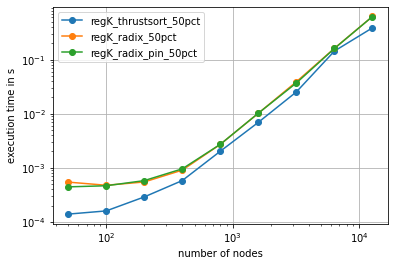

In [ ]:
plot_lines(regK_thrustsort_runs_d50 + regK_radix_runs_d50 + regK_radix_pin_runs_d50)
plt.savefig(common.OUT_DIR / "radix_vs_thrustsort_d50.png", dpi=200)


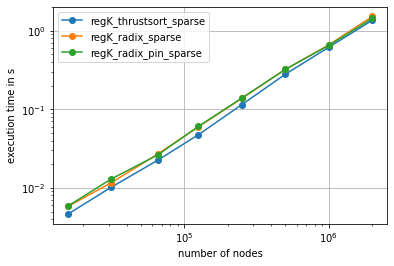

In [ ]:
plot_lines(regK_thrustsort_runs_sparse + regK_radix_runs_sparse + regK_radix_pin_runs_sparse)
plt.savefig(common.OUT_DIR / "radix_vs_thrustsort_sparse.png", dpi=200)

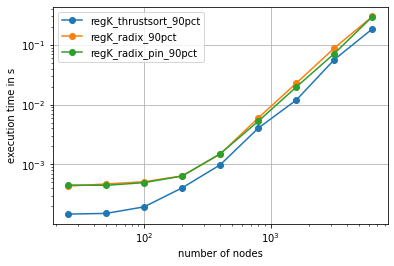

In [ ]:
plot_lines(regK_thrustsort_runs_d90 + regK_radix_runs_d90 + regK_radix_pin_runs_d90)
plt.savefig(common.OUT_DIR / "radix_vs_thrustsort_d90.png", dpi=200)

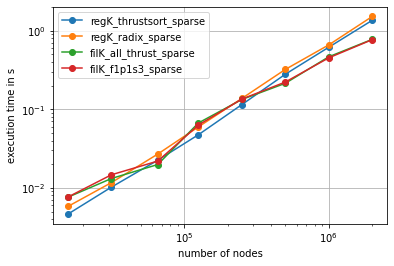

In [ ]:
plot_lines(regK_thrustsort_runs_sparse + regK_radix_runs_sparse + filK_all_thrust_sparse + filK_f1p1s3_sparse)
plt.savefig(common.OUT_DIR / "all_four_sparse.png", dpi=200)

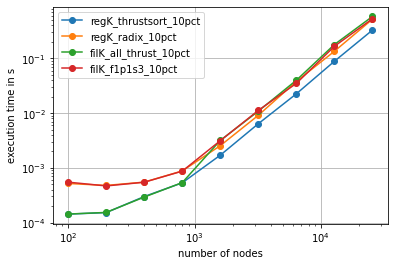

In [ ]:
plot_lines(regK_thrustsort_runs_d10 + regK_radix_runs_d10 + filK_all_thrust_d10 + filK_f1p1s3_d10)
plt.savefig(common.OUT_DIR / "all_four_d10.png", dpi=200)

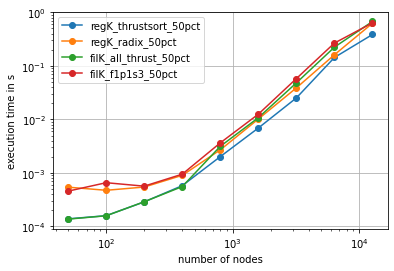

In [ ]:
plot_lines(regK_thrustsort_runs_d50 + regK_radix_runs_d50 + filK_all_thrust_d50 + filK_f1p1s3_d50)
plt.savefig(common.OUT_DIR / "all_four_d50.png", dpi=200)

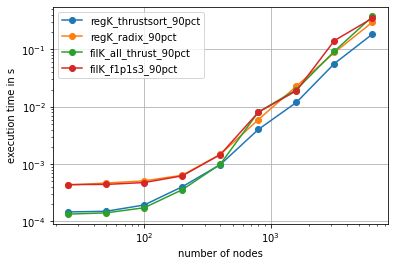

In [ ]:
plot_lines(regK_thrustsort_runs_d90 + regK_radix_runs_d90 + filK_all_thrust_d90 + filK_f1p1s3_d90)
plt.savefig(common.OUT_DIR / "all_four_d90.png", dpi=200)

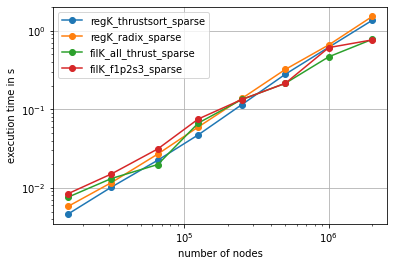

In [ ]:
plot_lines(regK_thrustsort_runs_sparse + regK_radix_runs_sparse + filK_all_thrust_sparse + filK_f1p2s3_sparse)
plt.savefig(common.OUT_DIR / "all_four_p2_sparse.png", dpi=200)

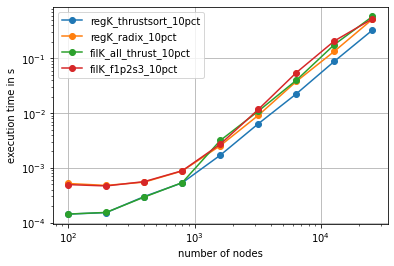

In [ ]:
plot_lines(regK_thrustsort_runs_d10 + regK_radix_runs_d10 + filK_all_thrust_d10 + filK_f1p2s3_d10)
plt.savefig(common.OUT_DIR / "all_four_p2_d10.png", dpi=200)

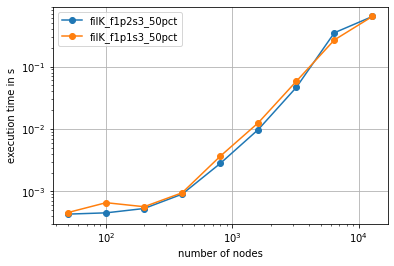

In [ ]:
plot_lines(filK_f1p2s3_d50 + filK_f1p1s3_d50)
plt.savefig(common.OUT_DIR / "compare_stream_d50.png", dpi=200)

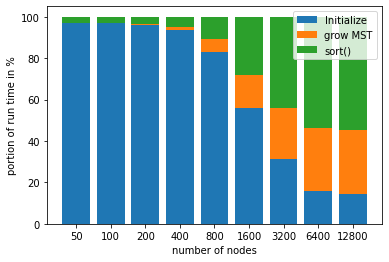

In [ ]:
stacked_bars(regK_radix_runs_d50, regular_kruskal=True)
plt.savefig(common.OUT_DIR / "bars_regK_radix_d50.png", dpi=200)


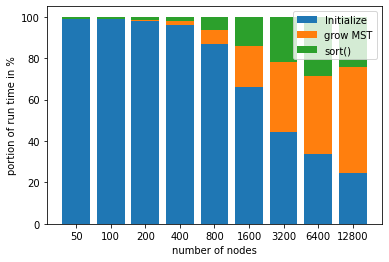

In [ ]:
stacked_bars(regK_thrustsort_runs_d50, regular_kruskal=True)
plt.savefig(common.OUT_DIR / "bars_regK_thrustsort_d50.png", dpi=200)


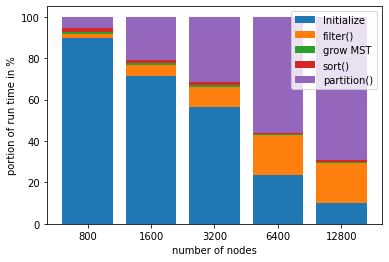

In [ ]:
stacked_bars(filK_f1p1s3_d50[-5:])
plt.savefig(common.OUT_DIR / "bars_filK_f1p1s3_d50.png", dpi=200)

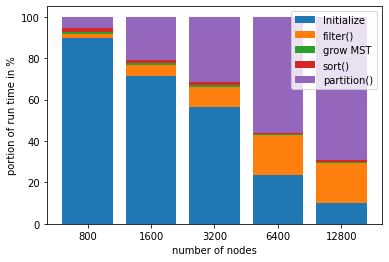

In [ ]:
stacked_bars(filK_f1p1s3_d50[-5:])
plt.savefig(common.OUT_DIR / "bars_filK_f1p1s3_d50.pdf", dpi=200,format='pdf')

[800, 1600, 3200, 6400, 12800]


dict_keys(['Initialize', 'filter()', 'grow MST', 'sort()', 'partition()'])

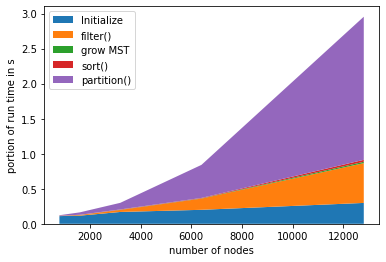

In [ ]:

labels, stack = collect_for_stack(filK_f1p1s3_d50[-5:])
print(labels)
stack
plt.stackplot(labels,stack['Initialize'],stack['filter()'], stack['grow MST'], stack['sort()'], stack['partition()'], labels=stack.keys())
plt.legend(loc='upper left')
plt.xlabel('number of nodes')
plt.ylabel('portion of run time in s')
stack.keys()